In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [26]:
len(X_train)

60000

In [27]:
X_train.shape

(60000, 28, 28)

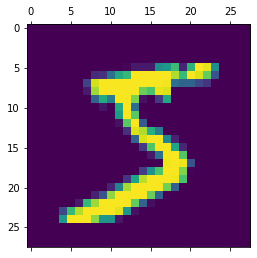

In [28]:
plt.matshow(X_train[0])

In [29]:
X_train=X_train/255
X_test=X_test/255

In [30]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)


In [31]:
X_train_flattened.shape

(60000, 784)

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 2ms/step - loss: 0.4688 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9262


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 9s 2ms/step - loss: 0.2659 - accuracy: 0.9255


[0.26590797305107117, 0.9254999756813049]

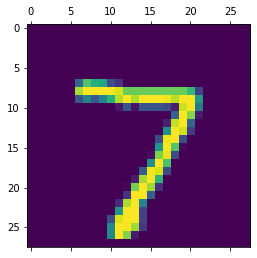

In [35]:
plt.matshow(X_test[0])

In [38]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([2.4899065e-02, 3.3833962e-07, 5.7591349e-02, 9.6268427e-01,
       2.5630295e-03, 1.5488443e-01, 1.1092205e-06, 9.9977875e-01,
       1.1317593e-01, 7.3984045e-01], dtype=float32)

In [39]:
np.argmax(y_predicted[0])

7

In [40]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    5,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    7,  926,   14,    7,    4,   10,   12,   42,    5],
       [   2,    0,   20,  917,    0,   25,    2,   12,   24,    8],
       [   2,    1,    6,    1,  908,    0,    8,    6,    9,   41],
       [   7,    2,    4,   34,    8,  773,   10,    6,   41,    7],
       [  10,    3,    9,    1,    7,   18,  904,    2,    4,    0],
       [   1,    5,   24,    5,    4,    1,    0,  950,    4,   34],
       [   4,    7,    7,   16,    9,   20,    8,   11,  885,    7],
       [   9,    7,    1,    8,   21,    6,    0,   24,   10,  923]])>

Text(69.0, 0.5, 'Real Values')

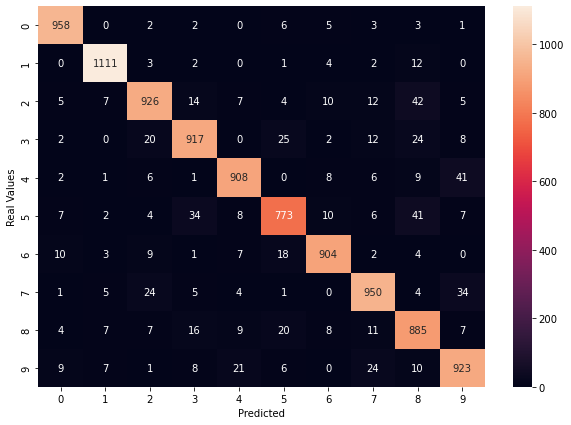

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Real Values")

In [49]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2729 - accuracy: 0.9228: 0s - loss: 0.2
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1221 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0845 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0637 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9841


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9740


[0.07928259670734406, 0.9739999771118164]

Text(69.0, 0.5, 'Real Values')

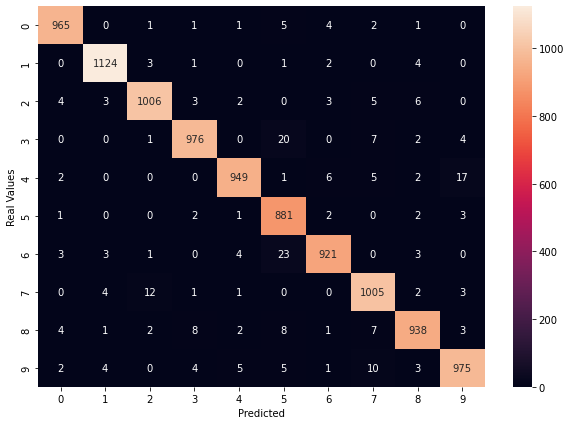

In [51]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Real Values")

In [53]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2713 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1216 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9801: 0s - l
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9849
